# Support Vector Machine 支持向量机
- SVM vs 传统算法
- 软间隔的作用
- 核函数的作用

In [2]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## 1.支持向量机带来的效果

### 线性支持向量机

In [3]:
# 绘制决策边界

def plot_svc_decision_boundary(svm_clf,xmin,xmax,sv=True):
    # x0w0 + x1w1 + b = 0
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # print(w)
    x0 = np.linspace(xmin,xmax,200)
    # 决策边界 x1
    decision_boundary = - w[0]/w[1]*x0 - b/w[1]
    # 优化目标，决策边界到支持向量的距离
    margin = 1/w[1]
    # 向上、向下两条虚线
    gutter_up = decision_boundary +  margin
    gutter_dowm = decision_boundary  - margin
    # 画支持向量
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    # 画决策边界
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_dowm,'k--',linewidth=2)

In [4]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
# 选取两列 'petal length’，'petal width’
X = iris.data[:,(2,3)] 
y = iris.target

# 将三分类转化成二分类问题，setosa', 'versicolor'
setosa_or_versicolor = (y==0) | (y==1) 
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(C=float('inf'),kernel='linear')
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

[0, 5.5, 0, 2]

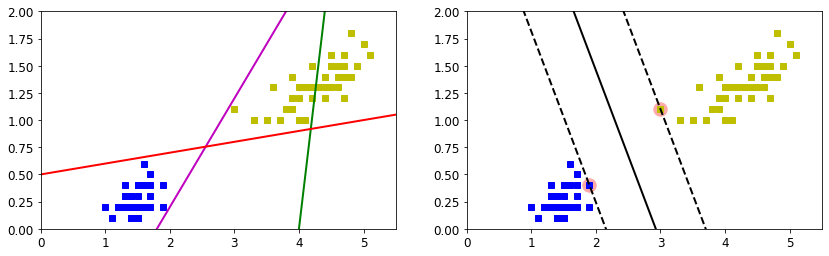

In [5]:
# 一般的模型
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 -20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5


plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'ys')
plt.plot(x0,pred_1,'g-',linewidth=2)
plt.plot(x0,pred_2,'m-',linewidth=2)
plt.plot(x0,pred_3,'r-',linewidth=2)
plt.axis([0,5.5,0,2])

plt.subplot(122)
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'ys')
plot_svc_decision_boundary(svm_clf,0,5.5,sv=True)
plt.axis([0,5.5,0,2])

### 软间隔（防止过拟合）
- 使用超参数C控制软间隔程度

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

iris = load_iris()
#  'petal length’，'petal width’
X = iris.data[:,(2,3)] 

# 'versicolor'
y = (iris.target==2).astype(np.float64)


In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1,random_state=42)
svm_clf2 = LinearSVC(C=100,random_state=42)

# scaled_svm_clf1 = Pipeline([('std',scaler),('linear_svc',svm_clf1)])
# scaled_svm_clf2 = Pipeline([('std',scaler),('linear_svc',svm_clf2)])

svm_clf1.fit(X,y)
svm_clf2.fit(X,y)

LinearSVC(C=100, random_state=42)

In [8]:
# b1 = svm_clf1.decision_function([- scaler.scale_/scaler.mean_])
# b2 = svm_clf2.decision_function([- scaler.scale_/scaler.mean_])
# w1 = svm_clf1.coef_[0]/scaler.scale_
# w2 = svm_clf2.coef_[0]/scaler.scale_
# svm_clf1.intercept_ = np.array([w1])
# svm_clf2.intercept_ = np.array([w2])

[4, 6, 0.8, 2.8]

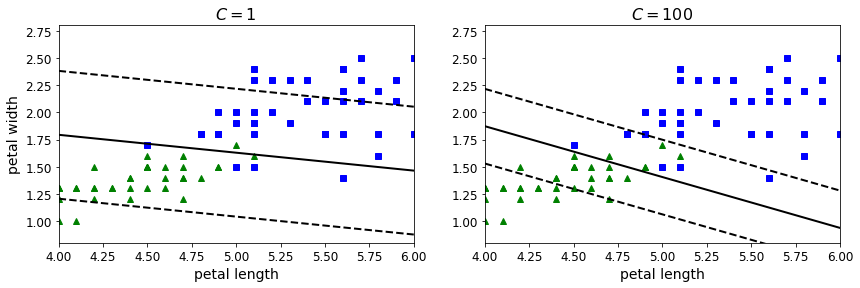

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X[:,0][y==0],X[:,1][y==0],'g^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plot_svc_decision_boundary(svm_clf1,4,6,sv=False)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('$C={}$'.format(svm_clf1.C),fontsize=16)
plt.axis([4,6,0.8,2.8])

plt.subplot(122)
plt.plot(X[:,0][y==0],X[:,1][y==0],'g^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plot_svc_decision_boundary(svm_clf2,4,6,sv=False)
plt.xlabel('petal length')
plt.title('$C={}$'.format(svm_clf2.C),fontsize=16)
plt.axis([4,6,0.8,2.8])

- 左侧，使用较低的C值，间隔要大很多，但很多实例始终会出现在间隔之内
- 右侧，使用较高的C值，分类器会减少误分类，最终会有较小的间隔

### 非线性支持向量机

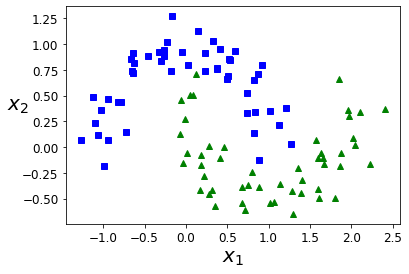

In [29]:
from matplotlib.colors import ListedColormap

# 绘制数据点
def plot_data(X):
    plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
    plt.xlabel(r'$x_1$',fontsize=20)
    plt.ylabel(r'$x_2$',fontsize=20,rotation=0)

    
# 绘制决策边界    
def plot_decision_boundaries(clf,X,y):
    mins = X.min(axis=0) - 0.3
    maxs = X.max(axis=0) + 0.3
    axes = [mins[0],maxs[0],mins[1],maxs[1]]
    
    
    x1,x2 = np.meshgrid(np.linspace(mins[0],maxs[0],100),
                        np.linspace(mins[1],maxs[1],100))
    X_new = np.c_[x1.ravel(),x2.ravel()] 
    y_pred = clf.predict(X_new).reshape(x1.shape)    
    
    # plt.contourf 绘制区域颜色
    custom_cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap1)
    
    # plt.contour 绘制等高线 
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2)
        
plot_data(X)
plt.show()

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [12]:
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)



polynomial_svm_clf = Pipeline([('polynomial_features',PolynomialFeatures(degree=3)),
                              ('scaler',StandardScaler()),
                              ('svm_clf',LinearSVC(loss='hinge',C=10))])
polynomial_svm_clf.fit(X,y )

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

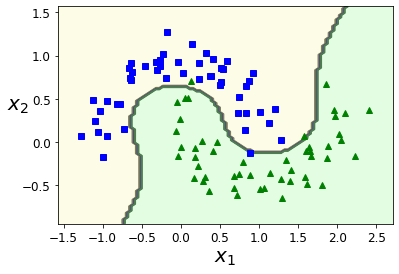

In [31]:
plot_data(X)
plot_decision_boundaries(polynomial_svm_clf,X,y)
plt.show()

### 高斯核函数
- 利用相似度来变换特征
- 径向基函数（rbf）

### SVM中利用核函数的计算技巧，大大降低了计算复杂度
- 增加gammaγ，使高斯曲线变窄，因此每个实例的影响范围都较小；决策边界最终变得更加不规则，在个别实例周围摆动
- 减少gammaγ，使高斯曲线变宽，因此实例具有更大的影响范围，并且决策边界更加平滑

In [14]:
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark,axis=1)**2)

gamma = 0.3
x1s = np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s = gaussian_rbf(x1s,-2,gamma)
x3s = gaussian_rbf(x1s,1,gamma)

XK = np.c_[gaussian_rbf(XID,-2,gamma),gaussian_rbf(XID,1,gamma)]
yk = np.array([0,0,1,1,1,1,1,0,0])


NameError: name 'XID' is not defined

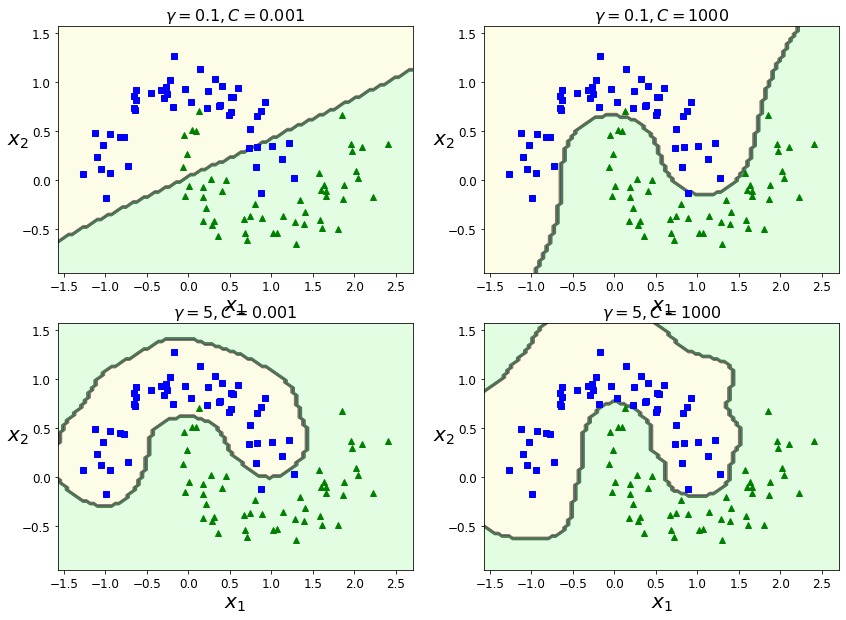

In [35]:
from sklearn.svm import SVC

gamma1,gamma2 = 0.1,5
C1,C2 = 0.001,1000
hyperparams = (gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)

svm_clfs = []
for gamma,C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),
                              ('svm_clf',SVC(kernel='rbf',gamma=gamma,C=C))])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
plt.figure(figsize=(14,10))
for i,svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_data(X)
    plot_decision_boundaries(svm_clf,X,y)   
    gamma,C = hyperparams[i]
    plt.title(r'$\gamma={},C={}$'.format(gamma,C),fontsize=16)
plt.show()

分类问题，通过交叉验证选择最合适的参数